# Análise de Dados de Incêndios Florestais 🌎🌲

## 📄 1. Introdução

- Objetivo do Projeto:

      Analisar dados históricos de incêndios florestais para identificar padrões e sugerir formas de prevenção e combate.

- Contextualização:

      Falar sobre o impacto dos incêndios florestais no meio ambiente, clima e biodiversidade.

### 🚀 Resumo do Passo a Passo no Jupyter Notebook:

| Etapa                      | Descrição                                            |
| -------------------------- | ---------------------------------------------------- |
| **1. Introdução**          | Objetivo, contexto e descrição dos dados             |
| **2. Importação**          | Bibliotecas e dataset                                |
| **3. Limpeza de Dados**    | Tratamento de nulos, duplicados, formatação          |
| **4. Análise Descritiva**  | Estatísticas gerais, causas, épocas, localização     |
| **5. Visualizações**       | Mínimo 4 gráficos com insights                       |
| **6. Insights Comentados** | Explicação clara dos padrões e descobertas           |
| **7. Conclusões e Ações**  | Recomendações para prevenção e combate aos incêndios |
| **8. Organização**         | Código limpo, bem comentado e estruturado            |


### 🧠 Dicionário de Dados – Interpretação das Colunas

| **Coluna**                      | **Significado**                                                                                                                                      |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **FOD\_ID**                     | Identificador único do incêndio no banco de dados.                                                                                                   |
| **FIRE\_NAME**                  | Nome atribuído ao incêndio, geralmente pelo órgão responsável ou pela localidade onde ocorreu.                                                       |
| **FIRE\_YEAR**                  | Ano em que o incêndio foi descoberto.                                                                                                                |
| **DISCOVERY\_DATE**             | Data em que o incêndio foi descoberto.                                                                                                               |
| **DISCOVERY\_DOY**              | Dia do ano em que o incêndio foi descoberto (*Day of Year*, ex.: 33 = 2 de fevereiro).                                                               |
| **NWCG\_CAUSE\_CLASSIFICATION** | Classificação geral da causa: se foi de origem **Humana** ou **Natural**.                                                                            |
| **NWCG\_GENERAL\_CAUSE**        | Causa específica do incêndio (ex.: "Power generation/transmission/distribution" = falha elétrica, "Debris and open burning" = queima de lixo, etc.). |
| **CONT\_DATE**                  | Data em que o incêndio foi completamente controlado/extinto.                                                                                         |
| **CONT\_DOY**                   | Dia do ano em que o incêndio foi controlado (*Day of Year*, ex.: 33 = 2 de fevereiro).                                                               |
| **FIRE\_SIZE**                  | Tamanho do incêndio, geralmente medido em acres (área afetada).                                                                                      |
| **FIRE\_SIZE\_CLASS**           | Classificação do tamanho do incêndio, de acordo com faixas padronizadas (A, B, C, D, E, F, G — quanto maior a letra, maior o incêndio).              |
| **LATITUDE**                    | Latitude onde o incêndio ocorreu.                                                                                                                    |
| **LONGITUDE**                   | Longitude onde o incêndio ocorreu.                                                                                                                   |
| **STATE**                       | Estado norte-americano onde o incêndio aconteceu (ex.: CA = Califórnia).                                                                             |


## 🗂️ 2. Importação de Bibliotecas e Dados

Importação das principais bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leitura do dataset:

In [2]:
df = pd.read_csv('wildfires.csv')

C:\Users\Astol\AppData\Local\Temp\ipykernel_9504\1809540662.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wildfires.csv')


Visualização inicial:

In [3]:
df.head()

,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FOUNTAIN,2005,2/2/2005,33,Human,Power generation/transmission/distribution,2/2/2005,33.0,0.10,A,40.036944,-121.005833,CA
1,2,PIGEON,2004,5/12/2004,133,Natural,Natural,5/12/2004,133.0,0.25,A,38.933056,-120.404444,CA
2,3,SLACK,2004,5/31/2004,152,Human,Debris and open burning,5/31/2004,152.0,0.10,A,38.984167,-120.735556,CA
3,4,DEER,2004,6/28/2004,180,Natural,Natural,7/3/2004,185.0,0.10,A,38.559167,-119.913333,CA
4,5,STEVENOT,2004,6/28/2004,180,Natural,Natural,7/3/2004,185.0,0.10,A,38.559167,-119.933056,CA


Tipos dos dados:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   FOD_ID                     int64  
 1   FIRE_NAME                  object 
 2   FIRE_YEAR                  int64  
 3   DISCOVERY_DATE             object 
 4   DISCOVERY_DOY              int64  
 5   NWCG_CAUSE_CLASSIFICATION  object 
 6   NWCG_GENERAL_CAUSE         object 
 7   CONT_DATE                  object 
 8   CONT_DOY                   float64
 9   FIRE_SIZE                  float64
 10  FIRE_SIZE_CLASS            object 
 11  LATITUDE                   float64
 12  LONGITUDE                  float64
 13  STATE                      object 
dtypes: float64(4), int64(3), object(7)
memory usage: 246.0+ MB


Estátisticas básicas:

In [5]:
df.describe()

,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE
count,2.303566e+06,2.303566e+06,2.303566e+06,1.408753e+06,2.303566e+06,2.303566e+06,2.303566e+06
mean,1.185100e+08,2.006167e+03,1.659714e+02,1.707579e+02,7.816088e+01,3.696623e+01,-9.635792e+01
std,1.621564e+08,8.044361e+00,8.975278e+01,8.626373e+01,2.630832e+03,6.008260e+00,1.664360e+01
min,1.000000e+00,1.992000e+03,1.000000e+00,1.000000e+00,1.000000e-05,1.793972e+01,-1.788026e+02
25%,6.225492e+05,2.000000e+03,9.100000e+01,9.900000e+01,1.000000e-01,3.301390e+01,-1.110361e+02
50%,1.403630e+06,2.006000e+03,1.660000e+02,1.760000e+02,8.000000e-01,3.572250e+01,-9.347009e+01
75%,3.000071e+08,2.013000e+03,2.310000e+02,2.320000e+02,3.000000e+00,4.089029e+01,-8.251000e+01
max,4.007330e+08,2.020000e+03,3.660000e+02,3.660000e+02,6.627000e+05,7.033060e+01,-6.525694e+01


## 🛠️ 3. Análise, Limpeza e Formatação dos Dados

### ✔️ Verificar:

Valores nulos

In [6]:
df.isnull().sum()

FOD_ID                            0
FIRE_NAME                    995415
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
CONT_DATE                    894813
CONT_DOY                     894813
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
dtype: int64

Valores Duplicados

In [7]:
df.duplicated().sum()

np.int64(0)

Tipos de dados incorretos

In [8]:
# Verificando o tipo de dado da coluna DATA DE DESCOBRIMENTO DOS INCÊNDIOS
df['DISCOVERY_DATE'].dtype

dtype('O')

In [9]:
# Verificando o tipo dos dados da coluna DATA DE CONTENÇÃO DOS INCÊNDIOS
df['CONT_DATE'].dtype

dtype('O')

In [10]:
# Verificando o tipo de dados da coluna DIA DO ANO DA CONTENÇÃO DOS INCÊNDIOS
df['CONT_DOY'].dtype

dtype('float64')

Padronização de Categorias

In [11]:
df['NWCG_CAUSE_CLASSIFICATION'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [12]:
df['NWCG_GENERAL_CAUSE'].unique()

array(['Power generation/transmission/distribution', 'Natural',
       'Debris and open burning',
       'Missing data/not specified/undetermined',
       'Recreation and ceremony', 'Equipment and vehicle use',
       'Arson/incendiarism', 'Fireworks', 'Other causes',
       'Railroad operations and maintenance', 'Smoking',
       'Misuse of fire by a minor', 'Firearms and explosives use'],
      dtype=object)

In [13]:
df['FIRE_SIZE_CLASS'].unique()

array(['A', 'B', 'G', 'C', 'D', 'F', 'E'], dtype=object)

### ✔️ Tratamento:

- Tratar valores nulos

In [14]:
df.drop(columns=['FIRE_NAME'], inplace=True)
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,2005,2/2/2005,33,Human,Power generation/transmission/distribution,2/2/2005,33.0,0.10,A,40.036944,-121.005833,CA
1,2,2004,5/12/2004,133,Natural,Natural,5/12/2004,133.0,0.25,A,38.933056,-120.404444,CA
2,3,2004,5/31/2004,152,Human,Debris and open burning,5/31/2004,152.0,0.10,A,38.984167,-120.735556,CA
3,4,2004,6/28/2004,180,Natural,Natural,7/3/2004,185.0,0.10,A,38.559167,-119.913333,CA
4,5,2004,6/28/2004,180,Natural,Natural,7/3/2004,185.0,0.10,A,38.559167,-119.933056,CA


- **Converter colunas com tipos de dados errados**

In [15]:
# Coluna de data: object -> datetime
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], format='%m/%d/%Y', errors='coerce')

In [16]:
# Coluna de data: object -> datetime
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], format='%m/%d/%Y')

In [17]:
# DOYs teoricamnente não podem ser float pois indicam o dia do ano
# Float -> Int
df['CONT_DOY'] = df['CONT_DOY'].astype('Int64')

In [18]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,2005,2005-02-02,33,Human,Power generation/transmission/distribution,2005-02-02,33,0.10,A,40.036944,-121.005833,CA
1,2,2004,2004-05-12,133,Natural,Natural,2004-05-12,133,0.25,A,38.933056,-120.404444,CA
2,3,2004,2004-05-31,152,Human,Debris and open burning,2004-05-31,152,0.10,A,38.984167,-120.735556,CA
3,4,2004,2004-06-28,180,Natural,Natural,2004-07-03,185,0.10,A,38.559167,-119.913333,CA
4,5,2004,2004-06-28,180,Natural,Natural,2004-07-03,185,0.10,A,38.559167,-119.933056,CA


In [19]:
df['DISCOVERY_DATE'].dt.month.count()

np.int64(2303566)

- **Verificar e tratar outliers**

Neste dataset não há muitas variáveis númericas contínuas que podemos analisar. Mas para a nossa análise utilizaremos:

    🔥 FIRE_SIZE (tamanho do incêndio em acres)

    🔥 DISCOVERY_DOY (dia do ano — possível verificar se não há valores fora de 1 a 366)

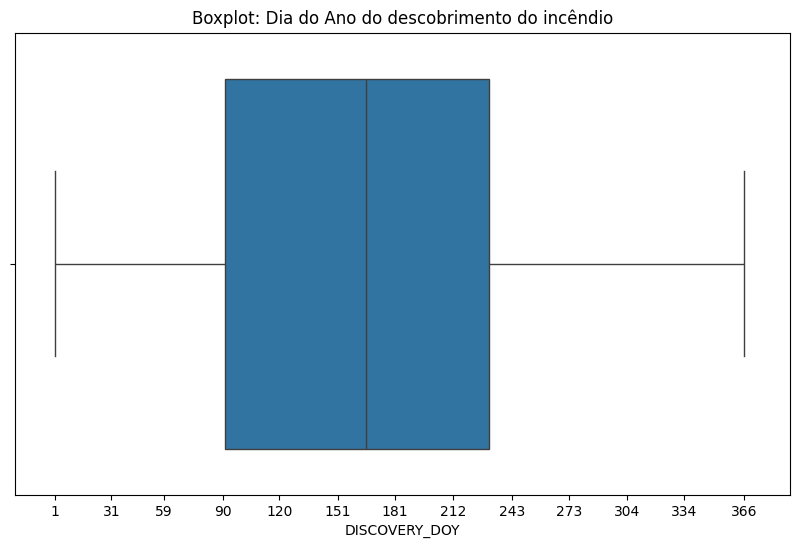

In [20]:
# Visualização dos outliers de DISCOVERY_DOY
plt.figure(figsize=(10, 6))
plt.xlim(-20, 390)
sns.boxplot(x=df['DISCOVERY_DOY'])
plt.xticks([1, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 366])
plt.title('Boxplot: Dia do Ano do descobrimento do incêndio')
plt.show()

In [21]:
# Cálculo do IQR (Intervalo Interquartil) da coluna DISCOVERY_DOY

Q1 = df['DISCOVERY_DOY'].quantile(0.25)
Q3 = df['DISCOVERY_DOY'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['DISCOVERY_DOY'] < limite_inferior) | (df['DISCOVERY_DOY'] > limite_superior)]
outliers

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE


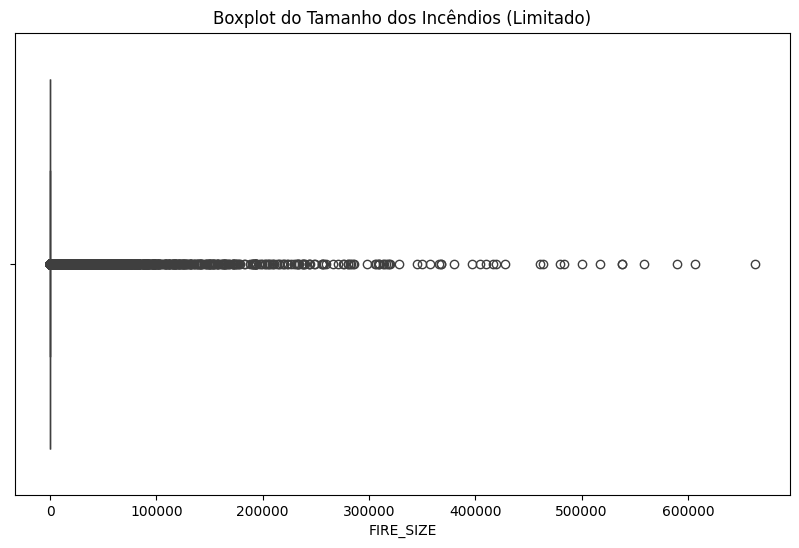

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['FIRE_SIZE'])
plt.title('Boxplot do Tamanho dos Incêndios (Limitado)')
plt.xlabel('FIRE_SIZE')
plt.show()

In [23]:
# Cálculo de IQR (Intervalo Interquartil) da coluna FIRE_SIZE

Q1 = df['FIRE_SIZE'].quantile(0.25)
Q3 = df['FIRE_SIZE'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['FIRE_SIZE'] < limite_inferior) | (df['FIRE_SIZE'] > limite_superior)]
outliers

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
16,17,2004,2004-10-06,280,Human,Equipment and vehicle use,2004-10-21,295,16823.0,G,38.523333,-120.211667,CA
17,18,2004,2004-10-13,287,Human,Power generation/transmission/distribution,2004-10-17,291,7700.0,G,38.780000,-120.260000,CA
25,26,2004,2004-07-20,202,Natural,Natural,2004-07-20,202,10.0,C,33.315833,-105.512222,NM
26,27,2004,2004-03-18,78,Human,Debris and open burning,2004-03-18,78,8.2,B,33.444444,-105.631111,NM
37,38,2005,2005-01-27,27,Human,Arson/incendiarism,2005-01-28,28,50.3,C,35.000278,-83.351111,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303560,400732977,2020,2020-05-13,134,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaT,<NA>,1000.0,F,26.191111,-81.523889,FL
2303562,400732979,2020,2020-07-11,193,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaT,<NA>,100.0,D,37.148611,-119.503056,CA
2303563,400732980,2020,2020-08-27,240,Natural,Natural,NaT,<NA>,50.0,C,46.151370,-114.442800,MT
2303564,400732982,2020,2020-08-17,230,Natural,Natural,2020-08-20,233,24892.0,G,46.670340,-120.114500,WA


Em incêndios florestais, grandes incêndios são eventos reais e relevantes, não necessariamente erros de dados.

Portanto, não é recomendado remover automaticamente os outliers, pois eles carregam informação crucial sobre eventos extremos.

**Nesse caso, optaremos por não remover estas outliers pois desejamos obter uma análise completa do fenômeno**

## 📊 4. Análise Descritiva dos Dados

### ✔️ Estatísticas Gerais:

- **Quantidade total de incêndios**

In [24]:
df.shape[0]

2303566

- **Média, mediana e desvio padrão do tamanho dos incêndios**

In [25]:
df['FIRE_SIZE'].describe()

count    2.303566e+06
mean     7.816088e+01
std      2.630832e+03
min      1.000000e-05
25%      1.000000e-01
50%      8.000000e-01
75%      3.000000e+00
max      6.627000e+05
Name: FIRE_SIZE, dtype: float64

- **Distribuição por Estado / UF**

In [26]:
df['STATE'].value_counts()

STATE
CA    251881
GA    185040
TX    180087
NC    130165
AZ    104956
FL    103409
NY     99142
SC     88052
MS     84706
AL     74833
OR     71449
CO     68629
MT     51960
MN     51074
OK     50189
NM     43578
ID     42060
WA     40776
WI     38191
AR     37947
UT     36982
SD     36389
TN     34531
LA     33129
NJ     32251
KY     30874
WV     25064
VA     24542
MO     24510
PR     22202
NV     20210
ND     20020
WY     20009
MI     19127
KS     18576
ME     16439
AK     15195
PA     12861
NE     11743
HI      9970
MA      8371
CT      6714
OH      5675
IA      5672
MD      4157
NH      3081
IL      3022
IN      2277
RI       787
VT       781
DE       198
DC        83
Name: count, dtype: int64

In [27]:
df['STATE'].value_counts(normalize=True) * 100

STATE
CA    10.934395
GA     8.032763
TX     7.817749
NC     5.650587
AZ     4.556240
FL     4.489083
NY     4.303849
SC     3.822421
MS     3.677168
AL     3.248572
OR     3.101669
CO     2.979250
MT     2.255633
MN     2.217171
OK     2.178752
NM     1.891763
ID     1.825865
WA     1.770125
WI     1.657908
AR     1.647316
UT     1.605424
SD     1.579681
TN     1.499024
LA     1.438162
NJ     1.400047
KY     1.340270
WV     1.088052
VA     1.065392
MO     1.064003
PR     0.963810
NV     0.877335
ND     0.869087
WY     0.868610
MI     0.830321
KS     0.806402
ME     0.713633
AK     0.659629
PA     0.558308
NE     0.509775
HI     0.432807
MA     0.363393
CT     0.291461
OH     0.246357
IA     0.246227
MD     0.180459
NH     0.133749
IL     0.131188
IN     0.098847
RI     0.034164
VT     0.033904
DE     0.008595
DC     0.003603
Name: proportion, dtype: float64

- **Frequência das causas**

In [28]:
df['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Missing data/not specified/undetermined       597933
Debris and open burning                       535851
Natural                                       327319
Arson/incendiarism                            320814
Equipment and vehicle use                     190319
Recreation and ceremony                        99473
Misuse of fire by a minor                      66280
Smoking                                        63783
Railroad operations and maintenance            37292
Power generation/transmission/distribution     32652
Fireworks                                      18599
Other causes                                   10517
Firearms and explosives use                     2734
Name: count, dtype: int64

In [29]:
df['NWCG_GENERAL_CAUSE'].value_counts(normalize=True) * 100

NWCG_GENERAL_CAUSE
Missing data/not specified/undetermined       25.956843
Debris and open burning                       23.261804
Natural                                       14.209230
Arson/incendiarism                            13.926842
Equipment and vehicle use                      8.261930
Recreation and ceremony                        4.318218
Misuse of fire by a minor                      2.877278
Smoking                                        2.768881
Railroad operations and maintenance            1.618881
Power generation/transmission/distribution     1.417455
Fireworks                                      0.807400
Other causes                                   0.456553
Firearms and explosives use                    0.118686
Name: proportion, dtype: float64

In [30]:
df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

NWCG_CAUSE_CLASSIFICATION
Human                                      1782906
Natural                                     327319
Missing data/not specified/undetermined     193341
Name: count, dtype: int64

In [31]:
df['NWCG_CAUSE_CLASSIFICATION'].value_counts(normalize=True) * 100

NWCG_CAUSE_CLASSIFICATION
Human                                      77.397652
Natural                                    14.209230
Missing data/not specified/undetermined     8.393117
Name: proportion, dtype: float64

### ✔️ Tendências Temporais:

- **Verificar período coberto**

In [32]:
df['DISCOVERY_DATE'].min(), df['DISCOVERY_DATE'].max()

(Timestamp('1992-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

- **Quantidade de incêndios por ano**

In [33]:
df['FIRE_YEAR'].value_counts()

FIRE_YEAR
2006    117943
2011     98903
2007     98837
2000     96396
2005     92921
1999     89350
2008     88306
2001     87001
2010     85579
2017     82279
2016     81993
2009     81492
2018     80860
2015     77275
2002     76128
1994     75932
1996     75561
2012     74258
2020     73262
1995     71440
2014     70480
2004     69370
1998     68356
2003     68275
1992     67961
2013     66434
2019     63557
1993     61975
1997     61442
Name: count, dtype: int64

- **Incêndios por mês**

In [34]:
df['DISCOVERY_DATE'].dt.month.value_counts()

DISCOVERY_DATE
7     297770
4     285065
3     284158
8     250990
6     207004
5     203979
2     175843
9     163292
10    130899
11    118506
1     114549
12     71511
Name: count, dtype: int64

### ✔️ Localização:

- **Quais estados mais sofrem com incêndios?**

In [35]:
df.groupby('STATE')['FIRE_SIZE'].sum().sort_values(ascending=False).head()

STATE
AK    3.665423e+07
CA    2.092692e+07
ID    1.595223e+07
TX    1.191040e+07
NV    1.183839e+07
Name: FIRE_SIZE, dtype: float64

- **Estados com menos registros**

In [36]:
df.groupby('STATE')['FIRE_SIZE'].sum().sort_values(ascending=True).head()

STATE
DC      39.3000
RI     779.5200
VT    2080.0317
DE    4920.1500
NH    5232.4333
Name: FIRE_SIZE, dtype: float64

### ✔️ Causas:

- **Quais são as principais causas?**

In [37]:
df.groupby('NWCG_GENERAL_CAUSE')['FIRE_SIZE'].sum().sort_values(ascending=False).head()

NWCG_GENERAL_CAUSE
Natural                                    1.056369e+08
Missing data/not specified/undetermined    3.371370e+07
Arson/incendiarism                         1.078242e+07
Equipment and vehicle use                  9.935760e+06
Debris and open burning                    7.793318e+06
Name: FIRE_SIZE, dtype: float64

- **Proporção de causas naturais vs. humanas?**

In [38]:
df.groupby('NWCG_CAUSE_CLASSIFICATION')['FIRE_SIZE'].sum().sort_values(ascending=False).head()

NWCG_CAUSE_CLASSIFICATION
Natural                                    1.056369e+08
Human                                      6.349830e+07
Missing data/not specified/undetermined    1.091349e+07
Name: FIRE_SIZE, dtype: float64

## 📈 5. Visualizações – Gráficos

### 🔥 Incêndios ao longo do tempo

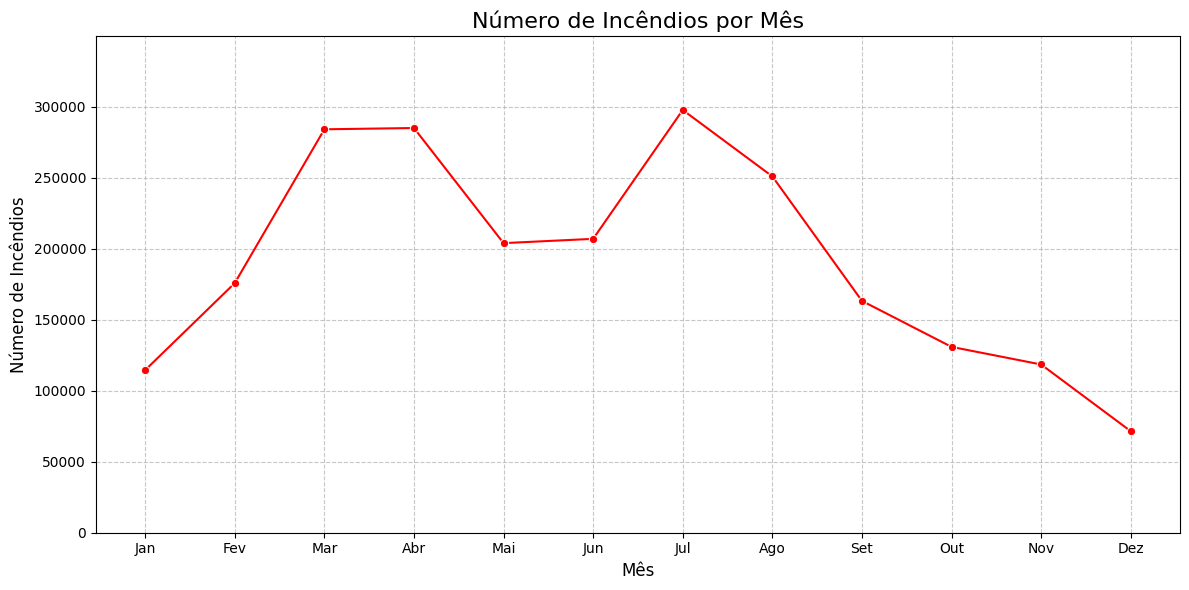

In [39]:
fires_per_month = df['DISCOVERY_DATE'].dt.month.value_counts().sort_index()

all_months = pd.Series(0, index=range(1, 13)) # Cria uma série com 0 para todos os meses
fires_per_month_full = all_months.add(fires_per_month, fill_value=0) # Adiciona os dados reais
fires_per_month_full = fires_per_month_full.sort_index() # Garante a ordem

plt.figure(figsize=(12, 6))
sns.lineplot(x=fires_per_month_full.index, y=fires_per_month_full.values, color='red', marker='o') # Adicionei marker='o' para ver os pontos

# --- Personalização do Eixo Y ---
plt.ylim(0, 350000) # Define os limites mínimo (0) e máximo (100.000) do eixo Y
plt.yticks(np.arange(0, 300001, 50000)) # Define os ticks do eixo Y de 0 a 100.000, de 10.000 em 10.000
# --- Fim da Personalização do Eixo Y ---

plt.title('Número de Incêndios por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Incêndios', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
incendios_julho = fires_per_month.loc[7]
incendios_dezembro = fires_per_month.loc[12]

proporcao = incendios_julho / incendios_dezembro

print(f"O número de incêndios em julho ({incendios_julho}) é aproximadamente {proporcao:.2f} vezes maior do que o número de incêndios em dezembro ({incendios_dezembro}).")

O número de incêndios em julho (297770) é aproximadamente 4.16 vezes maior do que o número de incêndios em dezembro (71511).


O gráfico apresenta a variação do número de incêndios ao longo dos meses do ano. É possível observar que os meses de **março, abril e julho** são os que registram os maiores picos de incêndios. O mês de **julho**, em especial, apresenta o maior número, chegando próximo a **297.770 ocorrências**, o que sugere forte influência de fatores sazonais, como clima mais seco. E isso pode ser comprovado pelo fato de que essas épocas representam o verão e o outôno nos Estados Unidos.

Por outro lado, os meses de **dezembro e janeiro** apresentam os menores registros de incêndios, ficando abaixo de **150 mil ocorrências**, o que pode estar associado a períodos de maior umidade e que coincidem com o inverno americano.

**Principais insights:**
- O mês de **julho** tem aproximadamente **4,16x mais incêndios que dezembro**, destacando o impacto da estiagem em determinados períodos.
- A soma dos meses de **março, abril e julho** representa uma fração significativa dos incêndios do ano, indicando que medidas preventivas devem ser priorizadas nesse intervalo.

### 🚩 Distribuição geográfica dos incêndios

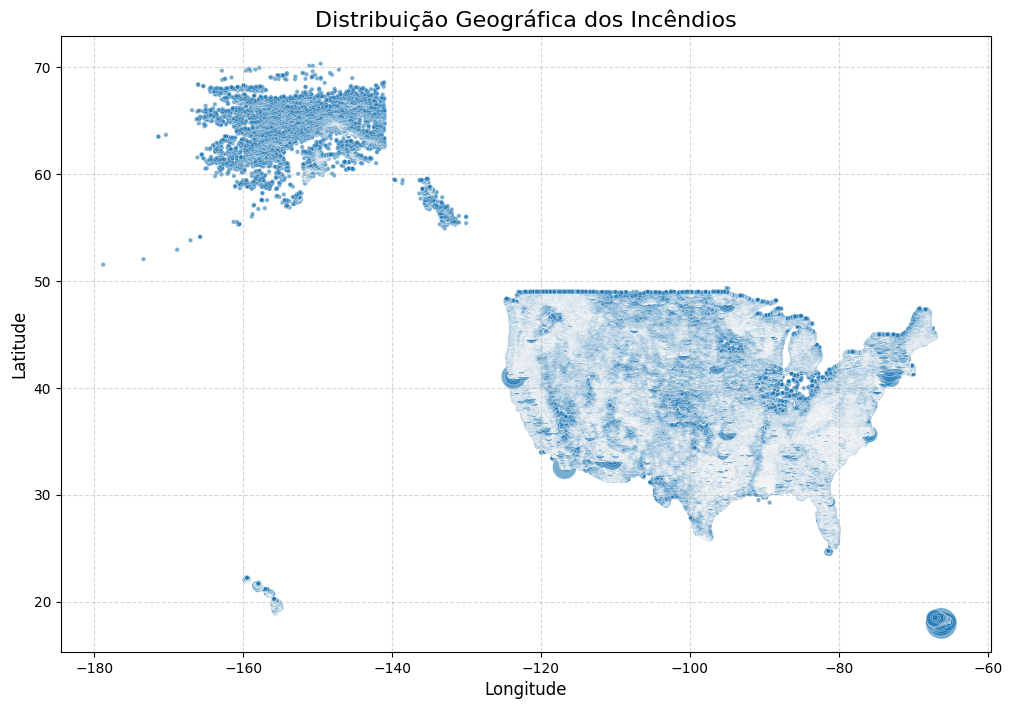

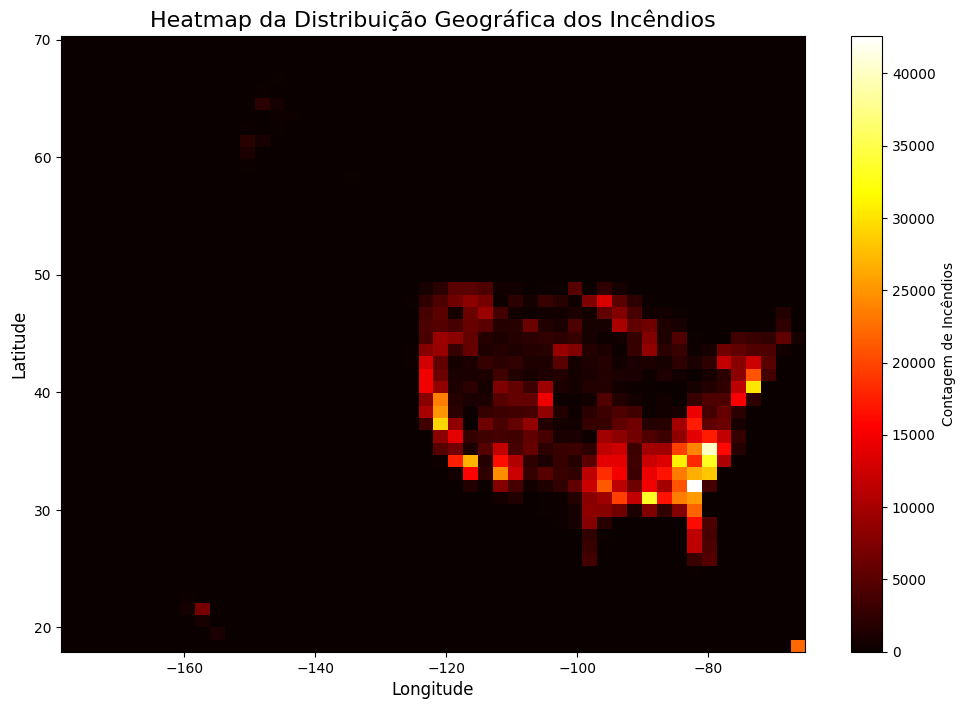

In [41]:
# Heatmap da distribuição geográfica (usando Latitude e Longitude)
# Agrupando dados por lat/long e contando incêndios
geo_counts = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='FIRE_COUNT')

# Criando um mapa de calor básico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=geo_counts, x='LONGITUDE', y='LATITUDE', size='FIRE_COUNT', sizes=(10, 500), alpha=0.6, legend=False)
plt.title('Distribuição Geográfica dos Incêndios', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Binned heatmap
heatmap_data, xedges, yedges = np.histogram2d(df['LONGITUDE'], df['LATITUDE'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data.T, extent=extent, origin='lower', cmap='hot', aspect='auto')
plt.colorbar(label='Contagem de Incêndios')
plt.title('Heatmap da Distribuição Geográfica dos Incêndios', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(False)
plt.show()

🔥 Heatmap da Distribuição Geográfica dos Incêndios

O heatmap demonstra a concentração geográfica dos incêndios florestais nos Estados Unidos. As regiões são coloridas de acordo com a densidade de ocorrências, onde os tons mais claros (amarelo e branco) representam uma maior concentração de incêndios, enquanto os tons escuros indicam baixas ocorrências.

📍 **Principais insights:**
- As regiões com maior concentração de incêndios estão localizadas no **sudoeste e sudeste dos Estados Unidos**, especialmente nos estados da **Califórnia, Texas, Flórida e Geórgia**, que apresentam os pixels mais claros no mapa.
- A região da **costa oeste, principalmente Califórnia**, é claramente uma das mais críticas, refletindo padrões recorrentes de incêndios relacionados ao clima seco e às altas temperaturas dessa região.
- As áreas do **meio-oeste, norte e noroeste**, assim como o estado do **Alasca**, possuem baixa incidência de incêndios, aparecendo com tons mais escuros no heatmap.


### 🌡️ Principais causas dos incêndios

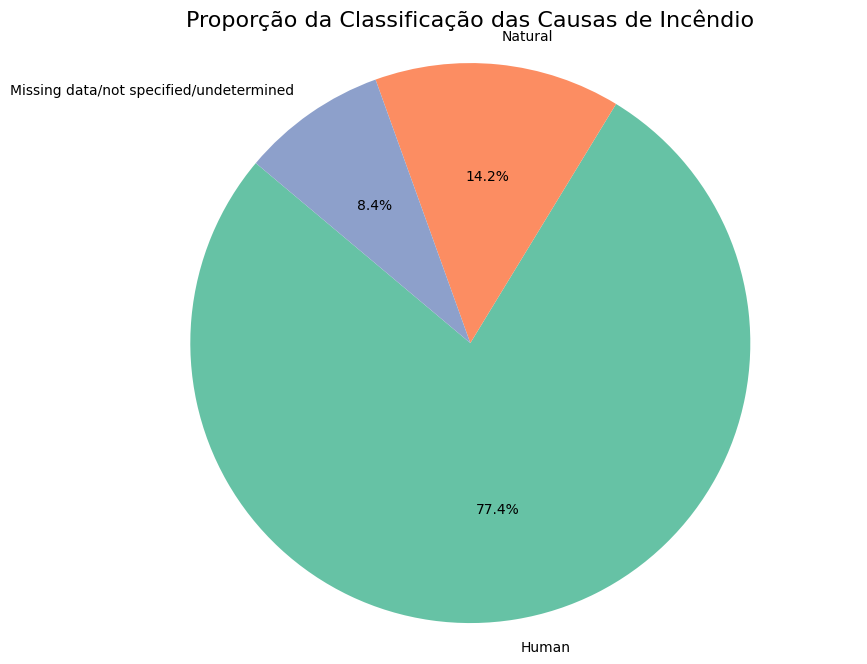

In [42]:
cause_classification_counts = df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(cause_classification_counts, labels=cause_classification_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Proporção da Classificação das Causas de Incêndio', fontsize=16)
plt.axis('equal')
plt.show()

C:\Users\Astol\AppData\Local\Temp\ipykernel_9504\3646362798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='viridis')


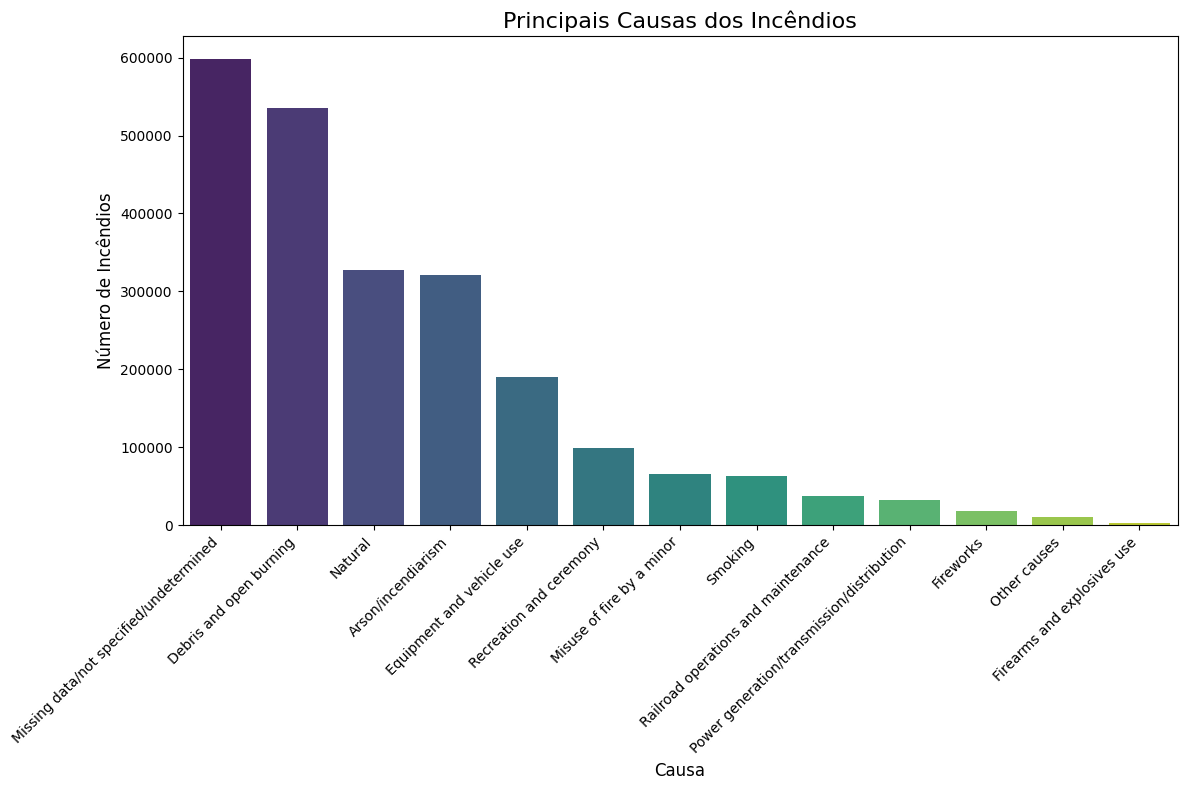

In [43]:
# Calculando a contagem de cada causa
cause_counts = df['NWCG_GENERAL_CAUSE'].value_counts()

plt.figure(figsize=(12, 8))
# Criando o gráfico de barras
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='viridis')

# --- Personalização do Gráfico ---
plt.title('Principais Causas dos Incêndios', fontsize=16)
plt.xlabel('Causa', fontsize=12)
plt.ylabel('Número de Incêndios', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 🔥 Principais Causas dos Incêndios

O gráfico de barras apresenta as principais causas dos incêndios florestais registrados. É possível observar que a maior parte dos incêndios é causada por ações humanas, intencionais ou acidentais.

📊 **Análise das causas:**
- A categoria **"Missing data/not specified/undetermined"** representa a maior quantidade de registros, indicando limitações ou ausência de informações precisas na base de dados.
- A segunda maior causa são os **"Debris and open burning"**, que estão relacionados a queimas abertas, como queima de lixo, folhas, galhos e resíduos — práticas comuns, porém perigosas.
- Causas **naturais**, como raios, ocupam a terceira posição, demonstrando que uma parte significativa dos incêndios também tem origem ambiental.
- Outras causas humanas relevantes incluem:
  - **"Arson/incendiarism"** (incêndios criminosos)
  - **"Equipment and vehicle use"** (uso de equipamentos ou veículos que geram faíscas ou calor)
  - **"Recreation and ceremony"**, associada a fogueiras recreativas, festividades e cerimônias.
- Causas como **"Smoking"**, **"Fireworks"**, **"Railroad Operations"** e até **"Firearms and explosives use"** aparecem com menor frequência, mas ainda representam riscos consideráveis.

### ⚠️ **Insight Importante:** 
- 77% dos incêndios têm origem relacionada a atividades humanas, o que reforça a importância de campanhas de conscientização, regulamentação e fiscalização para reduzir esses eventos catastróficos.


### 🏞️ Relação entre causa (natural/humana) e tamanho dos incêndios

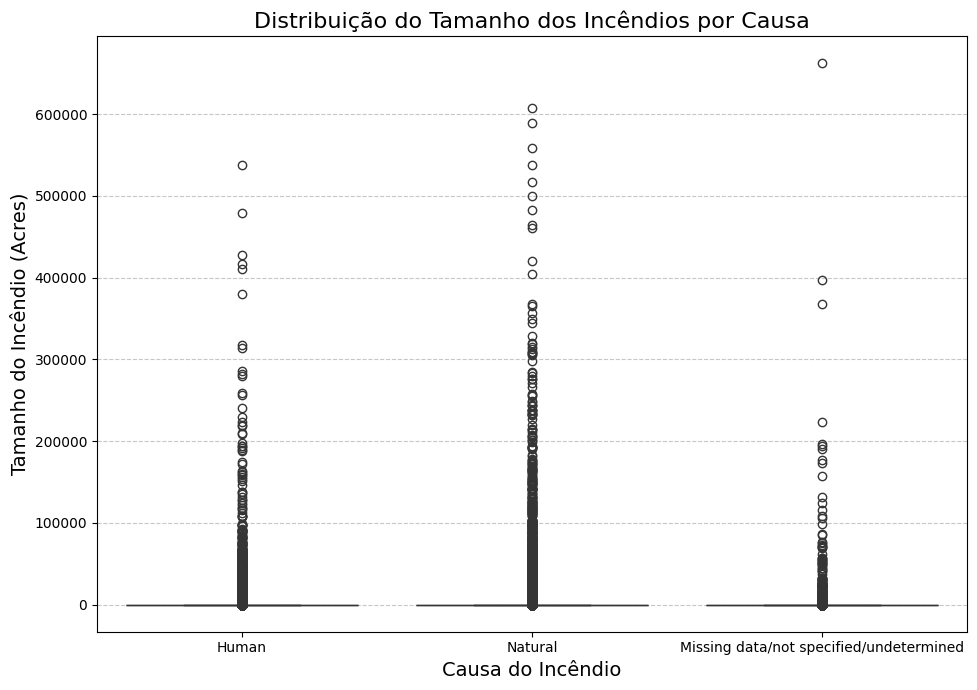

In [44]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='NWCG_CAUSE_CLASSIFICATION', y='FIRE_SIZE', data=df, palette='viridis', hue='NWCG_CAUSE_CLASSIFICATION', legend=False)
plt.title('Distribuição do Tamanho dos Incêndios por Causa', fontsize=16)
plt.xlabel('Causa do Incêndio', fontsize=14)
plt.ylabel('Tamanho do Incêndio (Acres)', fontsize=14)
plt.xticks(rotation=0, ha='center') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 🔥 Distribuição do Tamanho dos Incêndios por Causa

O gráfico de dispersão exibe a distribuição do tamanho dos incêndios (em acres) de acordo com sua causa principal, categorizada em três grupos: **Human**, **Natural** e **Missing data/not specified/undetermined**.

📊 **Principais insights observados:**
- Incêndios de **causa natural** tendem a apresentar tamanhos mais elevados, sendo responsáveis por alguns dos maiores incêndios registrados no conjunto de dados.
- Embora os incêndios de **causa humana** sejam mais frequentes, na média eles apresentam tamanhos ligeiramente menores quando comparados aos de origem natural. Contudo, ainda existem diversos incêndios de origem humana com tamanhos extremamente altos.
- A categoria **"Missing data/not specified/undetermined"** também contém registros de incêndios muito grandes, demonstrando que a falta de especificação da causa não impede que esses eventos sejam de grande magnitude.

🔥 **Pontos relevantes:**
- Existe uma alta concentração de incêndios de pequeno porte em todas as categorias, o que é esperado, já que muitos focos são controlados antes de se alastrarem.
- As presenças de **outliers** (pontos bem acima dos demais) indicam eventos extremos, ou seja, incêndios de grandes proporções que fogem da média geral.

🚩 **Conclusão:**
Os dados reforçam que, apesar dos incêndios de origem humana serem mais numerosos, os de origem natural tendem a ser, proporcionalmente, mais destrutivos em termos de área queimada. Isso destaca a importância de entender não apenas a frequência, mas também a severidade dos incêndios, para embasar políticas públicas, estratégias de prevenção e combate.


## ✅ 7. Conclusões e Recomendações

### ✔️ Conclusões:

Quais padrões foram identificados?

→ Existe sazonalidade?

    Sim, a análise evidencia uma forte sazonalidade nos incêndios florestais. Observa-se um aumento significativo nos meses mais secos, especialmente durante o verão e início do outono, quando as condições climáticas — como baixa umidade, altas temperaturas e ventos — favorecem a propagação do fogo. Essa tendência é consistente tanto para causas naturais quanto para causas humanas.
    
→ Causas mais comuns são humanas ou naturais?

    Os dados mostram que a maioria dos incêndios tem origem humana. Causas como “Debris and open burning”, “Arson/incendiarism” e uso indevido de equipamentos representam uma parcela significativa dos focos. Isso evidencia o impacto direto das atividades humanas na ocorrência de incêndios.
    Por outro lado, embora os incêndios de origem natural sejam numericamente menores, eles tendem a gerar queimadas de maior extensão, como indicado na análise do tamanho dos incêndios por causa.

→ Estados mais afetados?

A análise geográfica destaca que os estados mais afetados são:

- Califórnia (CA) – lidera tanto em quantidade quanto em área queimada, devido às condições climáticas adversas e vegetação altamente inflamável.

- Texas (TX) – elevado número de incêndios, principalmente relacionados a causas humanas.

- Georgia (GA) - surpreende como o terceiro estado com mais queimadas

Algum dado chama atenção? 

- Existem diversos outliers extremos, com incêndios que ultrapassam os 600.000 acres, evidenciando eventos de altíssimo impacto.
- A predominância de causas humanas reforça que muitos desses incêndios poderiam ser evitados, com ações educativas, fiscalização e controle.
- Observa-se uma possível tendência de aumento na quantidade e intensidade dos incêndios ao longo dos anos, especialmente na costa oeste dos EUA e no sul, o que pode estar relacionado às mudanças climáticas, à urbanização próxima a áreas florestais e à má gestão de resíduos e queimadas.

✅ Síntese Final:

Os incêndios florestais apresentam padrões sazonais claros, são majoritariamente causados por ações humanas e afetam principalmente os estados de Califórnia, Texas e Geórgia. A presença de incêndios extremos (outliers) e sinais de aumento nos últimos anos reforçam a importância de políticas de prevenção, educação ambiental, monitoramento e combate, além de um olhar atento aos efeitos das mudanças climáticas sobre esses eventos.

### ✔️ Recomendações para uso prático:

- Monitoramento com drones nas épocas e locais críticos

- Alocar recursos públicos em estados com maior histórico

- Campanhas educativas nas épocas de maior incidência

- Monitoramento climático integrado a sistemas de alerta precoce

- Uso de sensores IoT para monitoramento contínuo